## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, 
                         how ="left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].unique())
number_of_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_rows

duplicate_rows = combined_data[combined_data.duplicated(keep=False)]
print(duplicate_rows)

# duplicateRows = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
# print("Duplicate Rows except first occurrence based on all columns are :")
# print(duplicateRows)

duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
908                45.0                 0  
909                45.0                 0  
['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data[combined_data.duplicated(keep =False)]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_data_cleaned = combined_data.drop_duplicates(keep='first')
# print('Result DataFrame:\n', combined_data_cleaned)
combined_data_cleaned
# combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_number_of_mice = len(combined_data_cleaned["Mouse ID"].unique())
total_number_of_mice


249

In [7]:
# combined_data_cleaned.columns
# for conveniance some of the columns are renamed
combined_data_cleaned = combined_data_cleaned.rename(columns = {'Mouse ID': "Mouse_ID", 'Drug Regimen': "Drugs", 
                                           'Age_months':"Age", 'Weight (g)': "Weight", 'Timepoint':"Time_point",
                                           'Tumor Volume (mm3)': "Tumer_vol", 'Metastatic Sites': "Site"})

combined_data_cleaned.columns


Index(['Mouse_ID', 'Drugs', 'Sex', 'Age', 'Weight', 'Time_point', 'Tumer_vol',
       'Site'],
      dtype='object')

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_vol_by_drugs = combined_data_cleaned.groupby("Drugs")["Tumer_vol"]

tumor_vol_mean = combined_data_cleaned.groupby("Drugs")["Tumer_vol"].mean()
tumor_vol_median = combined_data_cleaned.groupby("Drugs")["Tumer_vol"].median()
tumor_vol_variance = combined_data_cleaned.groupby("Drugs")["Tumer_vol"].var()
tumor_vol_std = combined_data_cleaned.groupby("Drugs")["Tumer_vol"].std()
tumor_vol_sem = combined_data_cleaned.groupby("Drugs")["Tumer_vol"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_vol_stats = pd.DataFrame({
    "Mean": tumor_vol_mean,
    "Median": tumor_vol_median,
    "Variance": tumor_vol_variance,
    "Std": tumor_vol_std,
    "SEM": tumor_vol_sem
})

drug_vol_stats

# tumor_vol_by_drugs.describe()

,Mean,Median,Variance,Std,SEM
Drugs,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drugs_stats_agg = combined_data_cleaned.groupby("Drugs")["Tumer_vol"].aggregate(["mean", "median", "var", "std", "sem"])
drugs_stats_agg

,mean,median,var,std,sem
Drugs,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

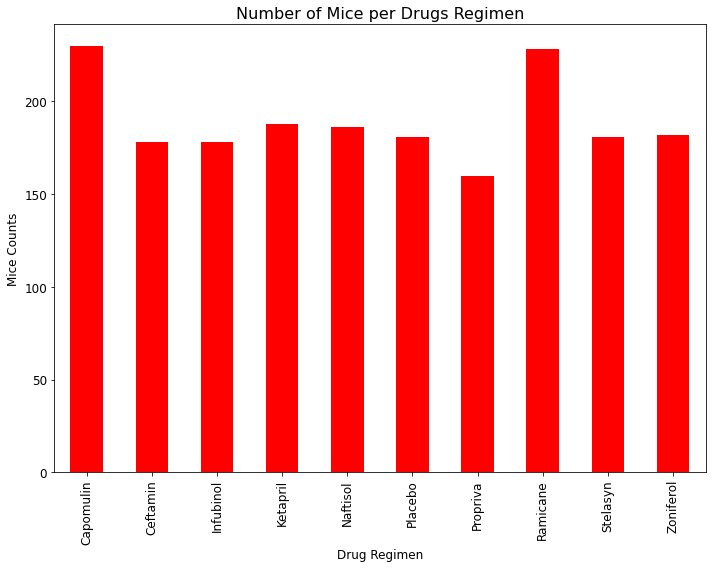

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mice_counts_drugs = combined_data_cleaned.groupby(["Drugs"]).count()["Mouse_ID"]

mice_counts_drugs

bar_pandas = mice_counts_drugs.plot.bar(figsize=(10,8), color='red',fontsize = 12)

plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Mice Counts",fontsize = 12)
plt.title("Number of Mice per Drugs Regimen",fontsize = 16)

# plt.savefig("../Images/Pan_mice_per_treat.png", bbox_inches = "tight")

plt.tight_layout()
plt.show()




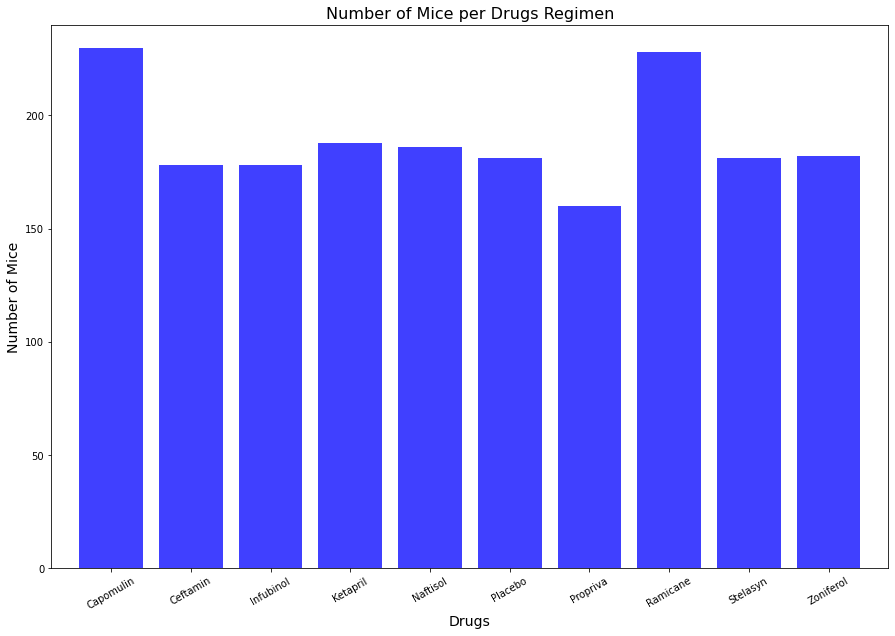

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

mice_counts_drugs_list =list(combined_data_cleaned.groupby(["Drugs"])["Mouse_ID"].count())
# mice_counts_drugs_list

x_axis = np.arange(len(mice_counts_drugs))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_counts_drugs_list, color='blue', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation=30)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_counts_drugs_list)+10)

plt.title("Number of Mice per Drugs Regimen",fontsize = 16)
plt.xlabel("Drugs",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)

# plt.savefig("../Images/mat_mice_per_treat.png", bbox_inches = "tight")
plt.show()


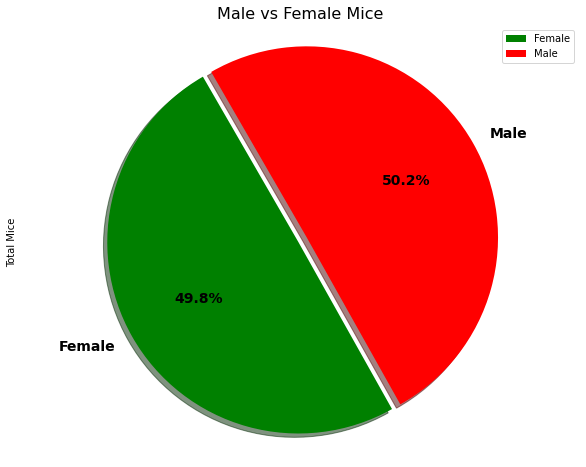

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender = combined_data_cleaned.groupby(["Mouse_ID","Sex"])
mice_gender = pd.DataFrame(mice_gender.size())

# Create the dataframe with total mice count by gender
mouse_gender = pd.DataFrame(mice_gender.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Mice"]

colors = ['green', 'red']
explode = (0.05, 0)
plot = mouse_gender.plot.pie(y="Total Mice",figsize=(10,8), colors = colors, 
                     startangle=120, explode = explode, shadow = True, autopct="%1.1f%%", 
                             textprops={"fontsize": 14, "weight": "bold"})

plt.title('Male vs Female Mice', fontsize = 16)
plt.axis("equal")

# plt.savefig("./Images/pi_pandas.png", bbox_inches = "tight")
plt.show()


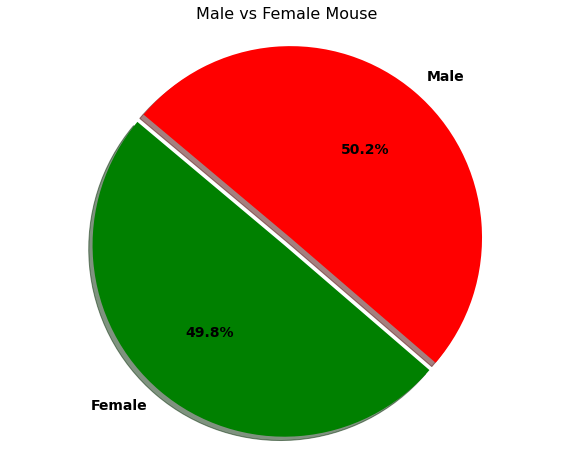

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['green', 'red']

#Determoine which section of the circle to detach
explode = (0.05, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=140, textprops={"fontsize": 14, "weight":"bold"})
plt.title('Male vs Female Mouse',fontsize = 16)
plt.axis("equal")

# plt.savefig("./Images/pi_plot.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

campomulin_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Capomulin", :]
ramicane_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Ramicane", :]
infubinol_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Infubinol", :]
ceftamin_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Ceftamin", :]



In [15]:
# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = campomulin_df.groupby('Mouse_ID').max()['Time_point']
capomulin_vol = pd.DataFrame(capomulin_last)
# capomulin_vol

ramicane_last = ramicane_df.groupby('Mouse_ID').max()['Time_point']
ramicane_vol = pd.DataFrame(ramicane_last)
# Ramicane_vol

infubinol_last = infubinol_df.groupby('Mouse_ID').max()['Time_point']
infubinol_vol = pd.DataFrame(infubinol_last)
# Infubinol_vol

ceftamin_last = ceftamin_df.groupby('Mouse_ID').max()['Time_point']
ceftamin_vol = pd.DataFrame(ceftamin_last)
# ceftamin_vol

In [29]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_final = pd.merge(capomulin_vol, combined_data_cleaned, on= ("Mouse_ID", "Time_point"), how = "left")
ramicane_final = pd.merge(ramicane_vol, combined_data_cleaned, on= ("Mouse_ID", "Time_point"), how = "left")
infubinol_final = pd.merge(infubinol_vol, combined_data_cleaned, on= ("Mouse_ID", "Time_point"), how = "left")
ceftamin_final = pd.merge(ceftamin_vol, combined_data_cleaned, on= ("Mouse_ID", "Time_point"), how = "left")
# ceftamin_final
capomulin_final
# ramicane_final
# infubinol_final


,Mouse_ID,Time_point,Drugs,Sex,Age,Weight,Tumer_vol,Site
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

Regimens = ['capomulin', 'ramicane', 'infubinol','ceftamin']

Regimens


['capomulin', 'ramicane', 'infubinol', 'ceftamin']

In [18]:
# Create empty list to fill with tumor vol data (for plotting)



In [19]:
capomulin_tumors = capomulin_final["Tumer_vol"]
ramicane_tumors = ramicane_final["Tumer_vol"]
infubinol_tumors = infubinol_final["Tumer_vol"]
ceftamin_tumors = ceftamin_final["Tumer_vol"]
Regimens_vol = pd.DataFrame({"capomulin": capomulin_tumors, "ramicane": ramicane_tumors, \
                             "infubinol": infubinol_tumors, "ceftamin": ceftamin_tumors})

# Regimens_vol

In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

capomulin_tumors = capomulin_final["Tumer_vol"]
ramicane_tumors = ramicane_final["Tumer_vol"]
infubinol_tumors = infubinol_final["Tumer_vol"]
ceftamin_tumors = ceftamin_final["Tumer_vol"]


Regimens_vol = pd.DataFrame({"capomulin": capomulin_tumors, "ramicane": ramicane_tumors, \
                             "infubinol": infubinol_tumors, "ceftamin": ceftamin_tumors})

capomulin_quartiles =Regimens_vol["capomulin"].quantile([.25,.5,.75])

capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
capomulin_outliers = capomulin_final.loc[(capomulin_final['Tumer_vol'] < capomulin_lower_bound) |\
                                         (capomulin_final['Tumer_vol'] > capomulin_upper_bound)]

print("Capomulin Lower Bound", capomulin_lower_bound)
print("Capomulin upper_bound", capomulin_upper_bound)
print("Capomulin Outlies : \n", capomulin_outliers)

print("==========================")

ramicane_quartiles =Regimens_vol["ramicane"].quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

ramicane_outliers = ramicane_final.loc[(ramicane_final['Tumer_vol'] < ramicane_lower_bound) | \
                                         (ramicane_final['Tumer_vol'] > ramicane_upper_bound)]

print("Ramicane Lower Bound", ramicane_lower_bound)
print("Ramicane upper_bound", ramicane_upper_bound)
print("Ramicane Outlies : \n", ramicane_outliers)

print("==========================")


infubinol_quartiles = Regimens_vol["infubinol"].quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

infubinol_outliers = infubinol_final.loc[(infubinol_final["Tumer_vol"] < infubinol_lower_bound) | \
                                         (infubinol_final["Tumer_vol"] > infubinol_upper_bound)]

print("Infubinol Lower Bound", infubinol_lower_bound)
print("Infubinol upper_bound", infubinol_upper_bound)
print("Infubinol Outliers : \n", infubinol_outliers)

print("==========================")
print()


ceftamin_quartiles = Regimens_vol["ceftamin"].quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

ceftamin_outliers = infubinol_final.loc[(ceftamin_final["Tumer_vol"] < ceftamin_lower_bound) | \
                                         (ceftamin_final["Tumer_vol"] > ceftamin_upper_bound)]

print("Ceftamin Lower Bound", ceftamin_lower_bound)
print("Ceftamin upper_bound", ceftamin_upper_bound)
print("ceftamin Outliers : \n", ceftamin_outliers)

print("==========================")



Capomulin Lower Bound 20.70456164999999
Capomulin upper_bound 51.83201549
Capomulin Outlies : 
 Empty DataFrame
Columns: [Mouse_ID, Time_point, Drugs, Sex, Age, Weight, Tumer_vol, Site]
Index: []
Ramicane Lower Bound 17.912664470000003
Ramicane upper_bound 54.30681135
Ramicane Outlies : 
 Empty DataFrame
Columns: [Mouse_ID, Time_point, Drugs, Sex, Age, Weight, Tumer_vol, Site]
Index: []
Infubinol Lower Bound 36.83290494999999
Infubinol upper_bound 82.74144559000001
Infubinol Outliers : 
   Mouse_ID  Time_point      Drugs     Sex  Age  Weight  Tumer_vol  Site
5     c326           5  Infubinol  Female   18      25  36.321346     0

Ceftamin Lower Bound 25.355449580000002
Ceftamin upper_bound 87.66645829999999
ceftamin Outliers : 
 Empty DataFrame
Columns: [Mouse_ID, Time_point, Drugs, Sex, Age, Weight, Tumer_vol, Site]
Index: []


In [21]:
# capomulin_tumors

In [22]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


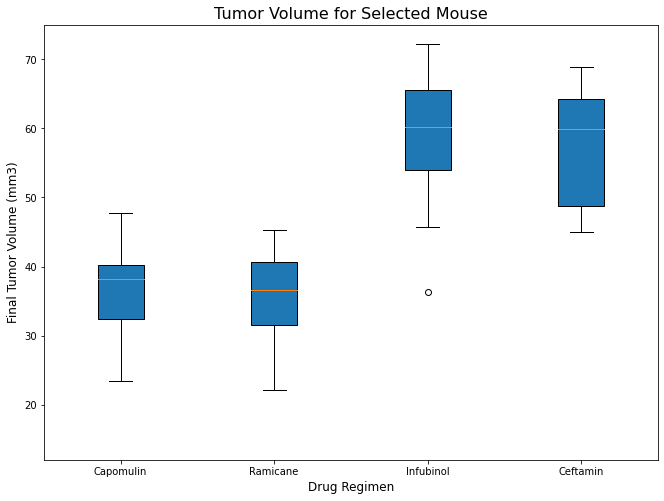

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(11, 8))
ax1.set_title('Tumor Volume for Selected Mouse',fontsize = 16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(data_to_plot, labels=Regimens, widths = 0.3, patch_artist=True,vert=True)

plt.ylim(12, 75)

# plt.savefig("../Images/box_plot.png", bbox_inches = "tight")

plt.show()

## Line and Scatter Plots

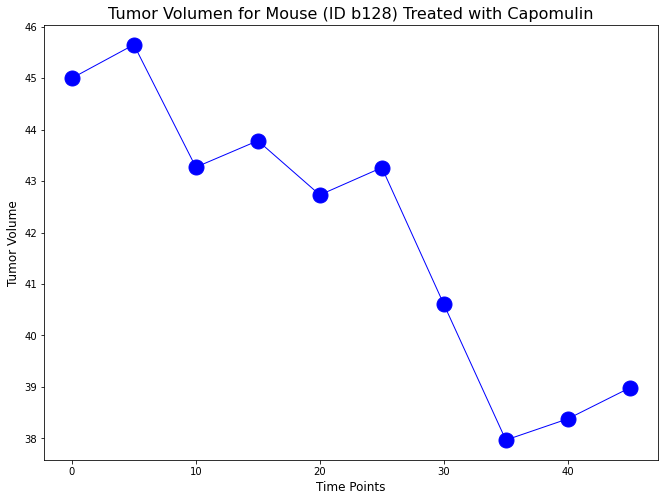

In [46]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Plotting a line graph for tumor volume for a mouse (ID b128) treated Capomulin 

campomulin_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Capomulin", :]

forline_df = campomulin_df.loc[campomulin_df["Mouse_ID"] == "b128",:]
# forline_df.head()


x_axis = forline_df.Time_point
tum_vol = list(forline_df.Tumer_vol)

fig1, ax1 = plt.subplots(figsize=(11, 8))

plt.title("Tumor Volumen for Mouse (ID b128) Treated with Capomulin", fontsize = 16)
plt.xlabel("Time Points", fontsize = 12)
plt.ylabel("Tumor Volume", fontsize = 12)
plt.plot(x_axis, tum_vol, markersize = 15, marker="o", color="Blue", linewidth=1)
plt.show()




In [58]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Calculating average tumor volume for Capomulion by ages of the mouse

avg_capomulin_vol =campomulin_df.groupby(['Mouse_ID']).mean()
# avg_capomulin_vol


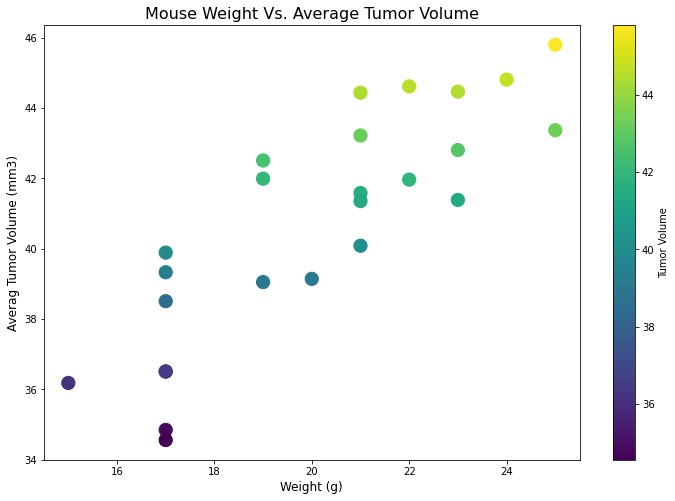

In [61]:
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(avg_capomulin_vol['Weight'],avg_capomulin_vol['Tumer_vol'],
            s=175, c=avg_capomulin_vol['Tumer_vol'])
clb= plt.colorbar()
plt.title('Mouse Weight Vs. Average Tumor Volume',fontsize =16)
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =12)
clb.set_label("Tumor Volume")

plt.show()




## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
